**Program**: 2_NSCH_AHR_Visualizations<br>
**Class**: Fall 2025, Machine Learning, Project<br>
**Member**: Vanessa Thorsten<br>
**Description**: This program reads in the analysis datasets NSCH_AHR_state.csv and NSCH_fam.csv, which include state- and individual-level data from the NSCH and state-level data from the AHR.<br>
**Outputs**: The following data visualizations are provided for the dataset, where the question number corresponds to the 10 questions of the study.<br>
'Q1_preventative_care_Poverty_reg.png'<br>
'Q2_preventative_care_good_immun_cat_box.png'<br>
'Q3_providers_public_health_reg_LT400.png'<br>
'Q4_place_for_care_providers_reg_LT450.png'<br>
'Q5_PrevMed_K2Q01_bar.png'<br>
'Q6_K2Q01_smAdeqIns_heat.png'<br>
'Q7_K2Q01_povlev4_bar.png'<br>
'Q7_K2Q01_povlev4_line.png'<br>
'Q8_K2Q01_WIC_line.png'<br>
'Q9_ScreenTime_HrsSleepNo_Line.png'<br>
'Q10_PrevMed_PlacesLived_Tab.png'<br>
  
**Program History/Modifications**:<br>
09/04/2025    Initial Version

In [1]:
#Read in packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Combined state level data
df_state = pd.read_csv("NSCH_AHR_state.csv")
df_state.head()

,Unnamed: 0,STATE,nomChHlthSt_23_1.0_proportion,nomChHlthSt_23_2.0_proportion,PrevMed_23_1.0_proportion,PrevMed_23_2.0_proportion,K4Q01_1.0_proportion,K4Q01_2.0_proportion,smAdeqIns_23_1.0_proportion,smAdeqIns_23_2.0_proportion,...,immunizations,complete_hs,population_LT18,Poverty,primary_care_providers,public_health,support_engagement_annual,Uninsured,good_immun_cat,Region
0,0,AK,0.9245,0.0755,0.7562,0.2438,0.8580,0.1420,0.6341,0.3659,...,59.8,93.2,23.9,10.4,359.3,334.0,0.024,10.4,Low,West
1,1,AL,0.9022,0.0978,0.7939,0.2061,0.8134,0.1866,0.7404,0.2596,...,62.6,89.1,22.1,16.0,241.0,137.0,-0.745,8.5,Low,South
2,2,AR,0.9153,0.0847,0.7550,0.2450,0.7856,0.2144,0.6842,0.3158,...,62.0,89.3,23.0,16.3,241.4,128.0,-1.020,8.9,Low,South
3,3,AZ,0.8792,0.1208,0.7597,0.2403,0.7400,0.2600,0.6240,0.3760,...,62.9,89.4,21.3,12.6,258.2,84.0,0.125,9.9,Low,West
4,4,CA,0.8839,0.1161,0.7497,0.2503,0.7087,0.2913,0.7053,0.2947,...,59.8,84.8,21.7,12.0,229.7,173.0,0.199,6.4,Low,West


In [3]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     51 non-null     int64  
 1   STATE                          51 non-null     object 
 2   nomChHlthSt_23_1.0_proportion  51 non-null     float64
 3   nomChHlthSt_23_2.0_proportion  51 non-null     float64
 4   PrevMed_23_1.0_proportion      51 non-null     float64
 5   PrevMed_23_2.0_proportion      51 non-null     float64
 6   K4Q01_1.0_proportion           51 non-null     float64
 7   K4Q01_2.0_proportion           51 non-null     float64
 8   smAdeqIns_23_1.0_proportion    51 non-null     float64
 9   smAdeqIns_23_2.0_proportion    51 non-null     float64
 10  healthy                        51 non-null     float64
 11  preventative_care              51 non-null     float64
 12  place_for_care                 51 non-null     float

In [4]:
df_fam = pd.read_csv("NSCH_fam.csv")

In [5]:
df_fam['HrsSleep_23'].value_counts()

HrsSleep_23
1.0    36893
2.0    16210
Name: count, dtype: int64

In [6]:
k2q01_labels = {
    1: 'Excellent',
    2: 'Very Good',
    3: 'Good',
    4: 'Fair',
    5: 'Poor'
}

YN_labels = {
    1: 'Yes',
    2: 'No'
}

povlev4_labels = {
    1: '0-99% of poverty level',
    2: '100-199% of poverty level',
    3: '200-399% of poverty level',
    4: '400% or more of poverty level'
}

ScreenTime_labels = {
    1: "Less than 1 hour",
    2: "1 hour",
    3: "2 hours",
    4: "3 hours",
    5: "4 or more hours"
}

PlacesLived_labels = {
    1: '0-2 places', 
    2: '3 or more places'
}

health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']
YN_order = ['Yes', 'No']
povlev4_order = ['0-99% of poverty level','100-199% of poverty level','200-399% of poverty level','400% or more of poverty level']
PlacesLived_order = ['0-2 places','3 or more places']
ScreenTime_order = ["Less than 1 hour", "1 hour", "2 hours", "3 hours", "4 or more hours"]

# Apply the labels
df_fam['K2Q01_labeled'] = df_fam['K2Q01'].map(k2q01_labels)
df_fam['PrevMed_labeled'] = df_fam['PrevMed_23'].map(YN_labels)
df_fam['smAdeqIns_labeled']= df_fam['smAdeqIns_23'].map(YN_labels)
df_fam['povlev4_labeled']= df_fam['povlev4_23'].map(povlev4_labels)
df_fam['WIC_labeled']= df_fam['WIC_23'].map(YN_labels)
df_fam['HrsSleep_labeled'] = df_fam['HrsSleep_23'].map(YN_labels)
df_fam['ScreenTime_labeled']= df_fam['ScreenTime_23'].map(ScreenTime_labels)
df_fam['PlacesLived_labeled']= df_fam['PlacesLived_23'].map(PlacesLived_labels)

df_fam.head()

,Unnamed: 0,FIPSST,STATE,STATE_NAME,STRATUM,HHID,FORMTYPE,TOTKIDS_R,FWC,SC_AGE_YEARS,...,ScreenTime_23,HrsSleep_23,K2Q01_labeled,PrevMed_labeled,smAdeqIns_labeled,povlev4_labeled,WIC_labeled,HrsSleep_labeled,ScreenTime_labeled,PlacesLived_labeled
0,0,6,CA,California,1,23043707,2,1,1318.476840,11,...,4.0,2.0,Very Good,Yes,Yes,200-399% of poverty level,No,No,3 hours,0-2 places
1,1,6,CA,California,1,23120547,3,2,978.499881,14,...,5.0,1.0,Very Good,Yes,Yes,400% or more of poverty level,No,Yes,4 or more hours,0-2 places
2,2,6,CA,California,1,23197456,3,1,904.191765,17,...,4.0,1.0,Good,Yes,Yes,100-199% of poverty level,NaN,Yes,3 hours,0-2 places
3,3,6,CA,California,1,23197458,3,2,1092.097256,12,...,4.0,1.0,Excellent,No,Yes,100-199% of poverty level,No,Yes,3 hours,0-2 places
4,4,6,CA,California,1,23235909,2,2,586.387870,10,...,5.0,1.0,Excellent,No,No,100-199% of poverty level,No,Yes,4 or more hours,0-2 places


In [7]:
df_fam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54159 entries, 0 to 54158
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              54159 non-null  int64  
 1   FIPSST                  54159 non-null  int64  
 2   STATE                   54159 non-null  object 
 3   STATE_NAME              54159 non-null  object 
 4   STRATUM                 54159 non-null  int64  
 5   HHID                    54159 non-null  int64  
 6   FORMTYPE                54159 non-null  int64  
 7   TOTKIDS_R               54159 non-null  int64  
 8   FWC                     54159 non-null  float64
 9   SC_AGE_YEARS            54159 non-null  int64  
 10  SC_SEX                  54159 non-null  int64  
 11  age3_23                 54159 non-null  int64  
 12  age5_23                 54159 non-null  int64  
 13  sex_23                  54159 non-null  int64  
 14  hispanic_23             54159 non-null

### Descriptive statistics

In [8]:
df_state[['healthy', 'preventative_care','place_for_care',
'insurance','immunizations','complete_hs','population_LT18',
'Poverty','primary_care_providers','public_health',
'support_engagement_annual','Uninsured']].describe().round(2)

,healthy,preventative_care,place_for_care,insurance,immunizations,complete_hs,population_LT18,Poverty,primary_care_providers,public_health,support_engagement_annual,Uninsured
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,50.00,51.00
mean,90.79,80.27,79.92,66.73,67.90,91.21,21.64,12.59,301.36,154.20,-0.14,7.18
std,2.06,4.20,4.44,4.16,5.15,2.36,1.92,2.51,55.17,145.51,0.48,2.68
min,86.20,69.80,69.70,59.00,57.80,84.80,17.70,8.30,221.00,66.00,-1.02,2.60
25%,89.40,77.50,76.70,63.40,64.30,89.55,20.50,11.05,265.15,96.00,-0.56,5.40
50%,91.00,80.20,79.90,65.80,67.70,91.40,21.60,12.20,298.60,123.00,-0.02,6.50
75%,92.40,82.35,82.60,69.10,70.40,93.05,23.00,13.65,327.95,156.50,0.24,9.00
max,95.40,89.30,88.60,78.30,83.10,95.50,27.30,19.50,553.60,1084.00,0.75,16.40


**Visualizations for the following study questions**:<br>
    <p>The research questions explored by these analyses are below. State-level comparisons include the 50 states and District of Columbia (N=51). For state-level 
      comparisons, the NSCH is of the weighted counts. Individual-level comparisons for the NSCH include all respondents with non-missing values (N=55,162)::
      <ol> 
        <li>What is the relationship between the percentage of households living below the federal poverty level (**AHR, 16184:poverty**) and children receiving 
          preventative care check-ups (**NSCH, state-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**)?<
        <li>What impact does children receiving preventative care check-ups (**NSCH, state-level, C1/C2, 1 or more visits versus no   visits, PrevMed_23**) have on the percentage of children who received by age 24 months all recommended vaccines (**AHR, 18114:vaccination**)? t_23)?</li>
        <li>How does public health funding per person (**AHR, 3837:public health funding**) infthe number of active primary care providers per 100,000 population (**AHR, 17673:primary care provider**)s_23**)? </li>
        <li>How does the number of active primary care providers per 100,000 population (**AHR, 17673:primary care provider**) relate to a child having a place to receive care regularly (**NSCH, state-level, C8, place usually take child when sick, K4Q01**)? </li>
        <li>How does at least one preventative care visit (**NSCH, individual-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**) influence overall child health (**NSCH, individual-level, A1, 
          excellent/very good/good/fair/poor, K2Q01**)?</li>
        <li>What effect does having continuous and adequate insurance (**NSCH, individual-level, E2/E3, insurance status, smAdeqIns_23**) have on overall child health 
          (**NSCH, individual-level, A1, excellent/very good versus good/fair/poor, nomChHlthSt_23**)?</li>
        <li>How does family's poverty level (**NSCH, individual-level, K3, income, povlev4_23	(Income level based on family poverty level status, imputed) **) impact children receiving 
          preventative care check-ups (**NSCH, individual-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**)?</li>
        <li>What is the relationship between benefits from the Women, Infants, and Children (WIC) Program (**NSCH, individual-level, I7, Yes/No**, WIC_23)) and children receiving 
          preventative care check-ups (**NSCH, state-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**)? </li>
        <li>What impact does use of electronics (**NSCH, individual-level, H6, time spent in front of the TV/computer/cellphone playing games/social 
          media (not counting homework), ScreenTime_23 **) have on whether child slept the average recommended number of hours for age (**NSCH, individual-level, H5, hours, HrsSleep_23 (Child slept recommended age-appropriate hours during an average day/on most weeknights, age 4 months – 17)**)? </li>
        <li>Does moving two or more times in the last year (**NSCH, individual-level, I11, number of places lived in the last year greater than 2, PlacesLived_23**) influence children
          receiving preventative care check-ups (**NSCH, individual-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**) </li>
      </ol>                 
   </ol>                 

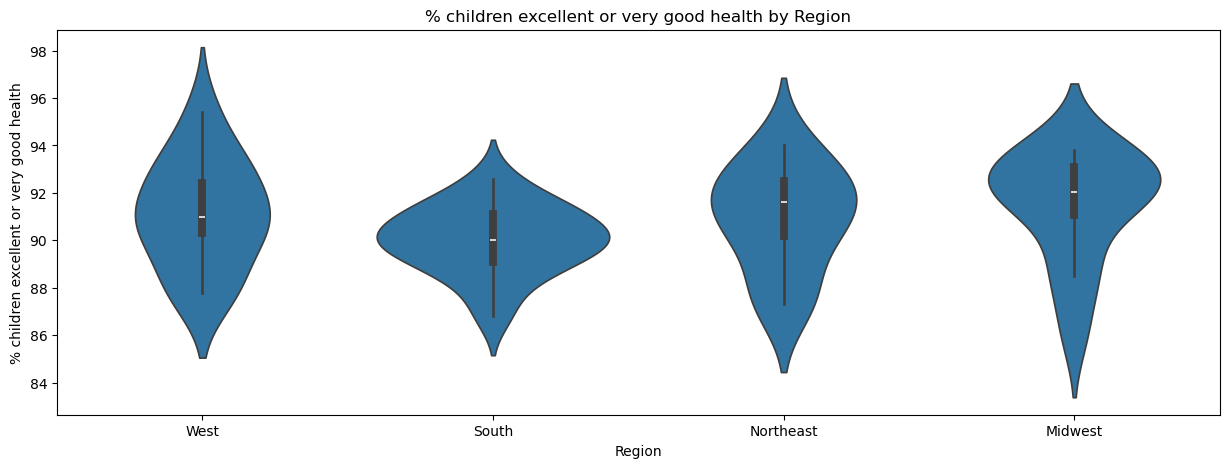

In [9]:
#Figure 
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=df_state, x='Region', y='healthy', dodge=True)
plt.xlabel('Region')
plt.ylabel('% children excellent or very good health')
plt.title("% children excellent or very good health by Region")
plt.show()

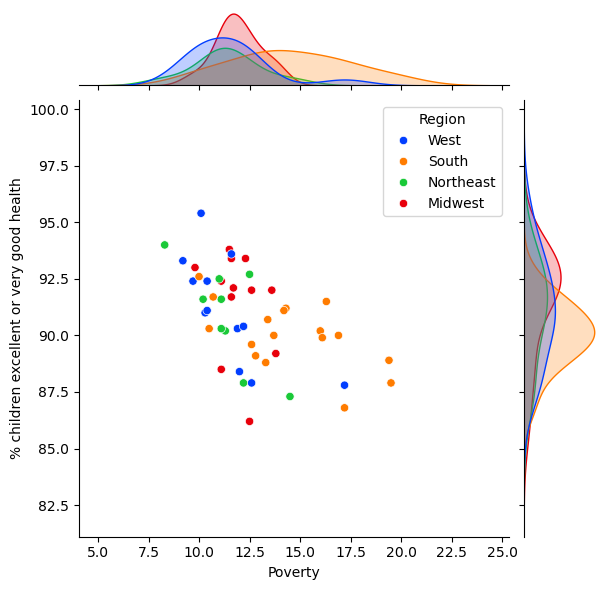

In [10]:
#Figure. Poverty and % children excellent or very good health by region
sns.jointplot(data=df_state, x='Poverty',y='healthy', hue='Region', palette='bright')
plt.xlabel('Poverty')
plt.ylabel('% children excellent or very good health')
plt.show()

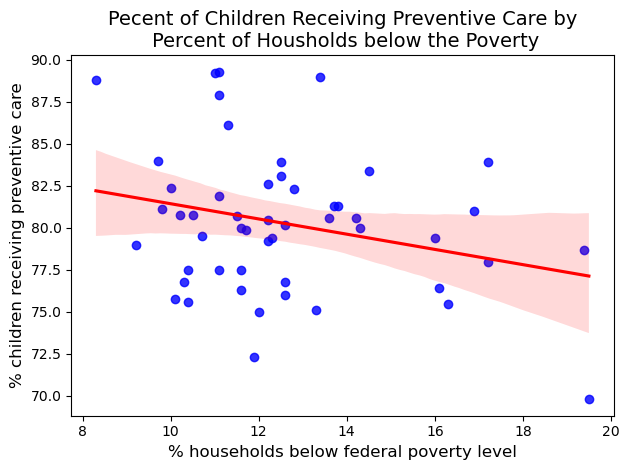

In [11]:
#1. What is the relationship between the percentage of households living 
#below the federal poverty level (**AHR, 16184:poverty**) and children receiving 
#preventative care check-ups (**NSCH, state-level, C1/C2, 1 or more visits versus
#no visits, PrevMed_23**)?
#Figure 1. gross domestic product by life satisfaction
# Scatterplot with trend line
sns.regplot(data=df_state, x='Poverty', y='preventative_care', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('% households below federal poverty level', fontsize=12)
plt.ylabel('% children receiving preventive care', fontsize=12)
plt.title("Pecent of Children Receiving Preventive Care by\n Percent of Housholds below the Poverty", fontsize=14)

# Save the plot
plt.savefig('Q1_preventative_care_Poverty_reg.png', dpi=300)  

plt.tight_layout()
plt.show()

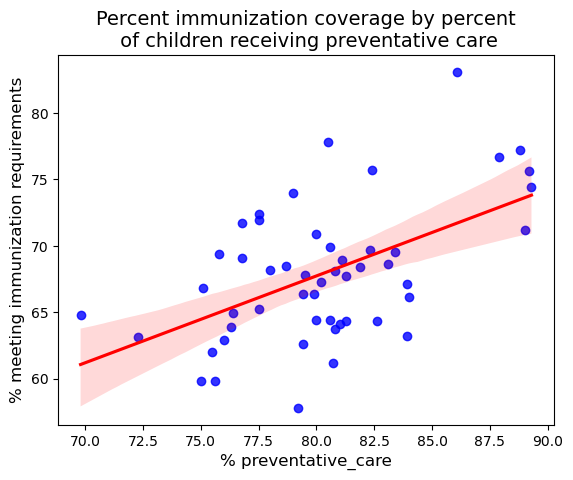

In [12]:
#2. What impact does children receiving preventative care check-ups (**NSCH, 
#state-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**) have
#on the percentage of children who received by age 24 months all 
#recommended vaccines (**AHR, 18114:vaccination**)?
#Figure 2a.  by excellent or very good health
# preventative care = more immunizations
# Scatterplot with trend line
sns.regplot(data=df_state, x='preventative_care', y='immunizations', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.xlabel('% preventative_care', fontsize=12)
plt.ylabel('% meeting immunization requirements', fontsize=12)
plt.title("Percent immunization coverage by percent\n of children receiving preventative care", fontsize=14)
plt.show()

In [13]:
pd.crosstab(df_state['good_immun_cat'], df_state['Region'])

Region,Midwest,Northeast,South,West
good_immun_cat,,,,
Low,4,2,11,8
Medium or high,8,7,6,5


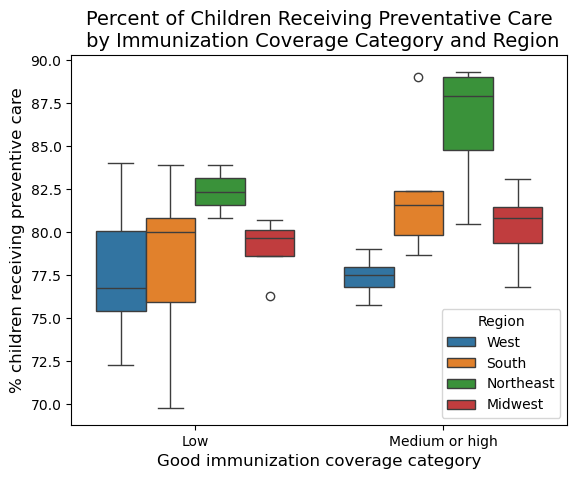

In [14]:
#Figure 2b. % excellent or very good health by Good immunization coverage categor
sns.boxplot(data=df_state, x='good_immun_cat', y='preventative_care', dodge=True, hue='Region')

plt.xlabel('Good immunization coverage category', fontsize=12)
plt.ylabel('% children receiving preventive care', fontsize=12)
plt.title("Percent of Children Receiving Preventative Care\n by Immunization Coverage Category and Region", fontsize=14)
plt.show()

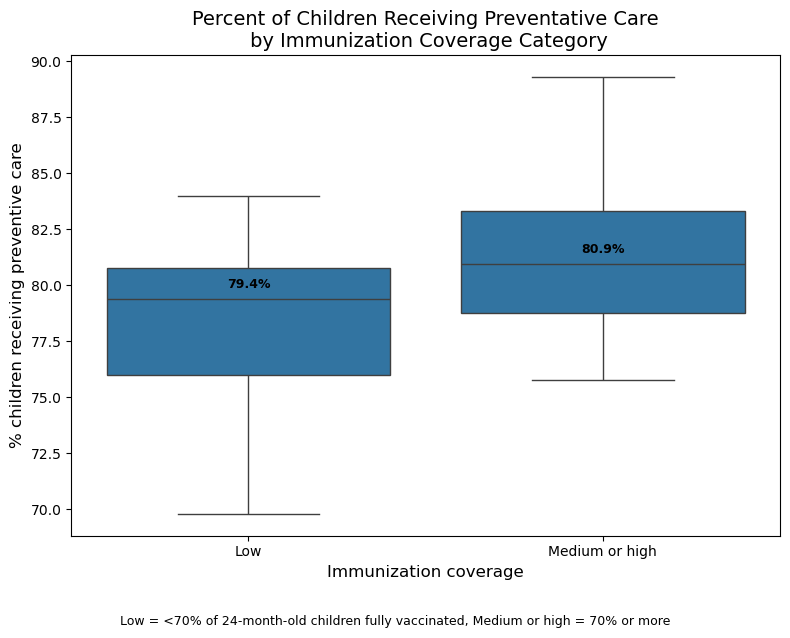

In [15]:
#Figure 2c. % excellent or very good health by Good immunization coverage categor
# Create the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df_state,
    x='good_immun_cat',
    y='preventative_care',
    dodge=True
)

# Labels and title
plt.xlabel('Immunization coverage', fontsize=12)
plt.ylabel('% children receiving preventive care', fontsize=12)
plt.title("Percent of Children Receiving Preventative Care\n by Immunization Coverage Category", fontsize=14)

#Compute medians for each category
medians = df_state.groupby('good_immun_cat')['preventative_care'].median()

#Add text labels for medians
for i, category in enumerate(medians.index):
    median_val = medians[category]
    ax.text(
        i,                # x-position (index of category)
        median_val + 0.5, # y-position slightly above the median line
        f'{median_val:.1f}%', 
        ha='center',
        color='black',
        fontsize=9,
        weight='bold'
    )

# Add footnote
plt.figtext(
    0.5, -0.05,
    "Low = <67.5% of 24-month-old children fully vaccinated, Medium or high = 70% or more",
    wrap=True, horizontalalignment='center', fontsize=9
)

# Save the plot
plt.tight_layout()
plt.savefig('Q2_preventative_care_good_immun_cat_box.png', dpi=300)  
plt.show()

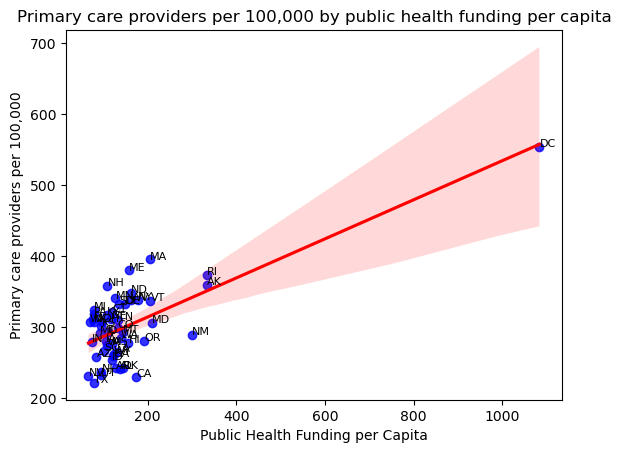

In [16]:
#3. How does public health funding per person (**AHR, 3837:public health funding**) 
#influence **)?
sns.regplot(data=df_state, x='public_health', y='primary_care_providers', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add STATE labels to each point
for i, row in df_state.iterrows():
    plt.text(row['public_health'] + 0.2,  # x position (slightly offset)
             row['primary_care_providers'],  # y position
             row['STATE'], fontsize=8)

plt.xlabel('Public Health Funding per Capita')
plt.ylabel('Primary care providers per 100,000')
plt.title("Primary care providers per 100,000 by public health funding per capita")
plt.show()

In [17]:
# Filter for DC
dc_row = df_state[df_state['STATE'] == 'DC']

# Print specific columns
print(dc_row[['primary_care_providers', 'public_health']])

# Extract the values as floats or strings
providers = dc_row['primary_care_providers'].values[0]
ph_pct = dc_row['public_health'].values[0]

   primary_care_providers  public_health
7                   553.6         1084.0


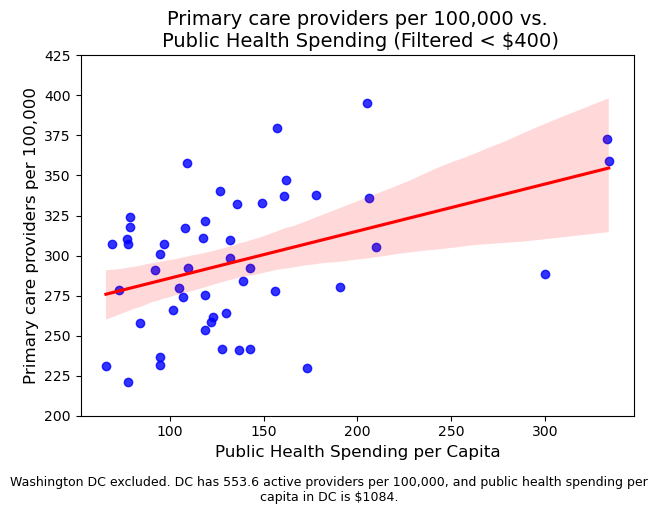

In [18]:
# Filter the DataFrame
df_filtered = df_state[df_state['public_health'] < 400]

# Plot regplot with filtered data
sns.regplot(
    data=df_filtered,
    x='public_health',
    y='primary_care_providers',
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Public Health Spending per Capita', fontsize=12)
plt.ylabel('Primary care providers per 100,000', fontsize=12)
plt.title('Primary care providers per 100,000 vs.\n Public Health Spending (Filtered < $400)', fontsize=14)

# Add footnote
plt.figtext(0.5, -0.05, 
            f"Washington DC excluded. DC has {providers:.1f} active providers per 100,000, "
            f"and public health spending per capita in DC is ${ph_pct:.0f}.", 
            wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.ylim(200, 425) 

# Save the plot
plt.savefig('Q3_providers_public_health_reg_LT400.png', dpi=300)  

plt.tight_layout()
plt.show()

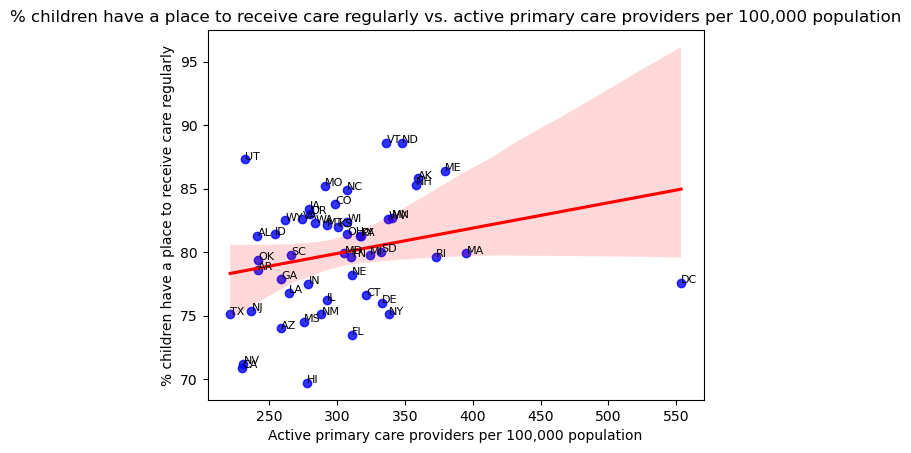

In [19]:
#4. How does the number of active primary care providers per 100,000 population (**AHR, 
#17673:primary care provider**) relate to a child having a place to receive care regularly
#(**NSCH, state-level, C8, place usually take child when sick, K4Q01**)?
sns.regplot(data=df_state, x='primary_care_providers', y='place_for_care', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add STATE labels to each point
for i, row in df_state.iterrows():
    plt.text(row['primary_care_providers'] + 0.2,  # x position (slightly offset)
             row['place_for_care'],  # y position
             row['STATE'], fontsize=8)

plt.xlabel('Active primary care providers per 100,000 population')
plt.ylabel('% children have a place to receive care regularly')
plt.title("% children have a place to receive care regularly vs. active primary care providers per 100,000 population")
plt.show()

In [20]:
# Filter for DC
dc_row = df_state[df_state['STATE'] == 'DC']

# Print specific columns
print(dc_row[['primary_care_providers', 'place_for_care']])

# Extract the values as floats or strings
providers = dc_row['primary_care_providers'].values[0]
care_pct = dc_row['place_for_care'].values[0]

   primary_care_providers  place_for_care
7                   553.6            77.6


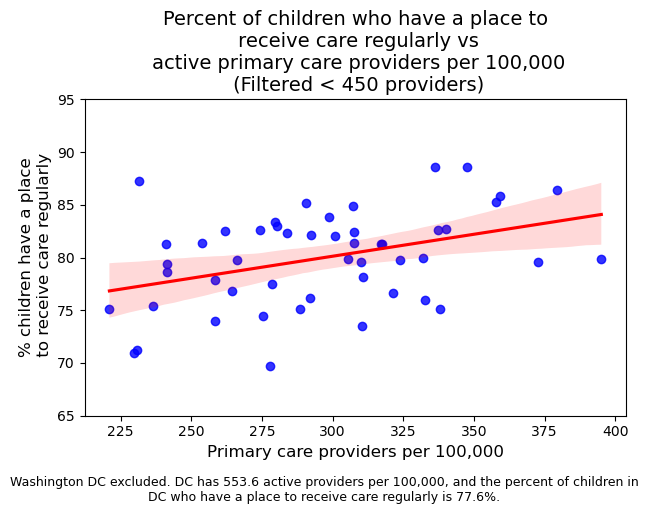

In [21]:
# Filter the DataFrame
df_filtered = df_state[df_state['primary_care_providers'] < 450]

# Plot regplot with filtered data
sns.regplot(
    data=df_filtered,
    x='primary_care_providers',
    y='place_for_care',
    scatter_kws={'color': 'blue'},
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Primary care providers per 100,000', fontsize=12)
plt.ylabel('% children have a place\n to receive care regularly', fontsize=12)
plt.title('Percent of children who have a place to\n receive care regularly vs\n active primary care providers per 100,000\n (Filtered < 450 providers)', fontsize=14)
# Add footnote
plt.figtext(0.5, -0.05, 
            f"Washington DC excluded. DC has {providers:.1f} active providers per 100,000, "
            f"and the percent of children in DC who have a place to receive care regularly is {care_pct:.1f}%.", 
            wrap=True, horizontalalignment='center', fontsize=9)

plt.ylim(65, 95) 
plt.tight_layout()

# Save the plot
plt.savefig('Q4_place_for_care_providers_reg_LT450.png', dpi=300)  

plt.show()

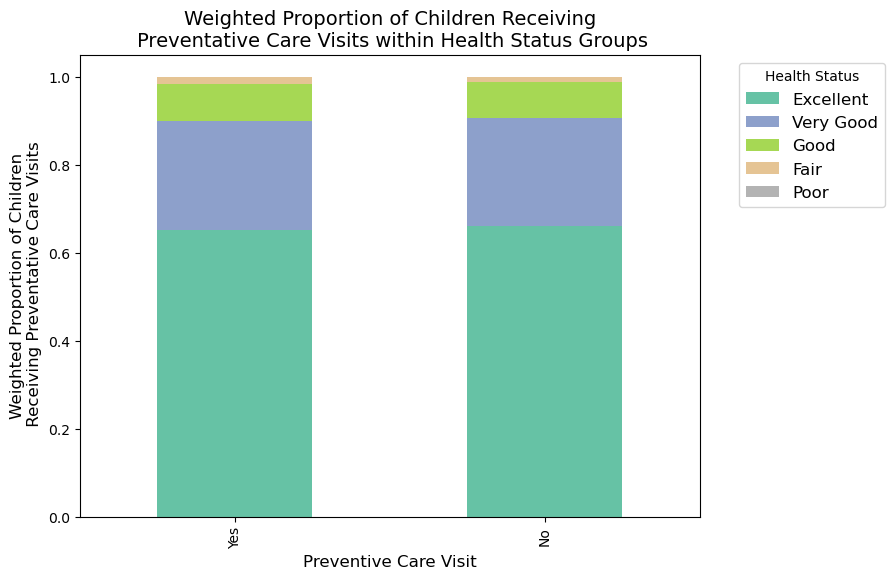

In [22]:
#5. How does at least one preventative care visit (**NSCH, individual-level, C1/C2, 1 or more visits versus
#no visits, PrevMed_23**) influence overall child health (**NSCH, individual-level, A1, 
#excellent/very good/good/fair/poor, K2Q01**)?

#Compute weighted totals
weighted_totals = pd.crosstab(
    df_fam['PrevMed_labeled'],
    df_fam['K2Q01_labeled'],
    values=df_fam['FWC'],
    aggfunc='sum'
).reindex(index=YN_order, columns= health_order)

#Compute row sums
row_sums = weighted_totals.sum(axis=1)

#Divide by row sums to get weighted proportions
weighted_props = weighted_totals.div(row_sums, axis=0)

# Plot
weighted_props.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))

plt.title('Weighted Proportion of Children Receiving\n Preventative Care Visits within Health Status Groups', fontsize=14)
plt.xlabel('Preventive Care Visit', fontsize=12)
plt.ylabel('Weighted Proportion of Children\n Receiving Preventative Care Visits', fontsize=12)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

#plt.tight_layout()

# Save the plot
plt.savefig('Q5_PrevMed_K2Q01_bar.png', dpi=300, bbox_inches='tight')  


plt.show()


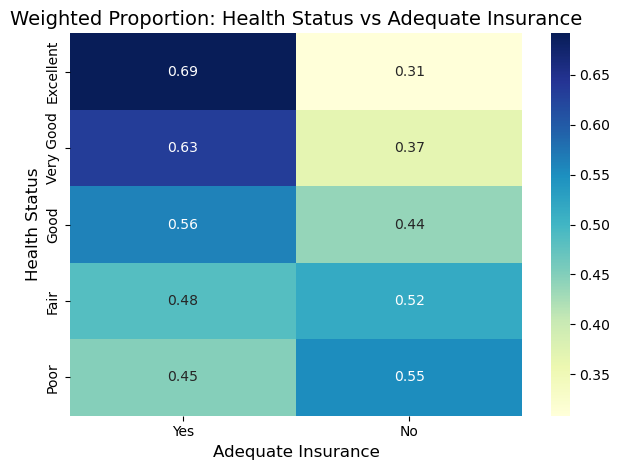

In [23]:
#6. What effect does having continuous and adequate insurance (**NSCH, individual-level, 
#E2/E3, insurance status, smAdeqIns_23**) have on overall child health (**NSCH, 
#individual-level, A1, excellent/very good versus good/fair/poor, nomChHlthSt_23**)?
# Create a proportion table (normalize by row)

#Compute weighted totals
weighted_totals = pd.crosstab(
    df_fam['K2Q01_labeled'],
    df_fam['smAdeqIns_labeled'],
    values=df_fam['FWC'],
    aggfunc='sum'
).reindex(index=health_order, columns=YN_order)

#Compute row sums
row_sums = weighted_totals.sum(axis=1)

#Divide by row sums to get weighted proportions
weighted_props = weighted_totals.div(row_sums, axis=0)

#Plot
sns.heatmap(weighted_props, annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Weighted Proportion: Health Status vs Adequate Insurance', fontsize=14)
plt.xlabel('Adequate Insurance', fontsize=12)
plt.ylabel('Health Status', fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig('Q6_K2Q01_smAdeqIns_heat.png', dpi=300)  

plt.show()

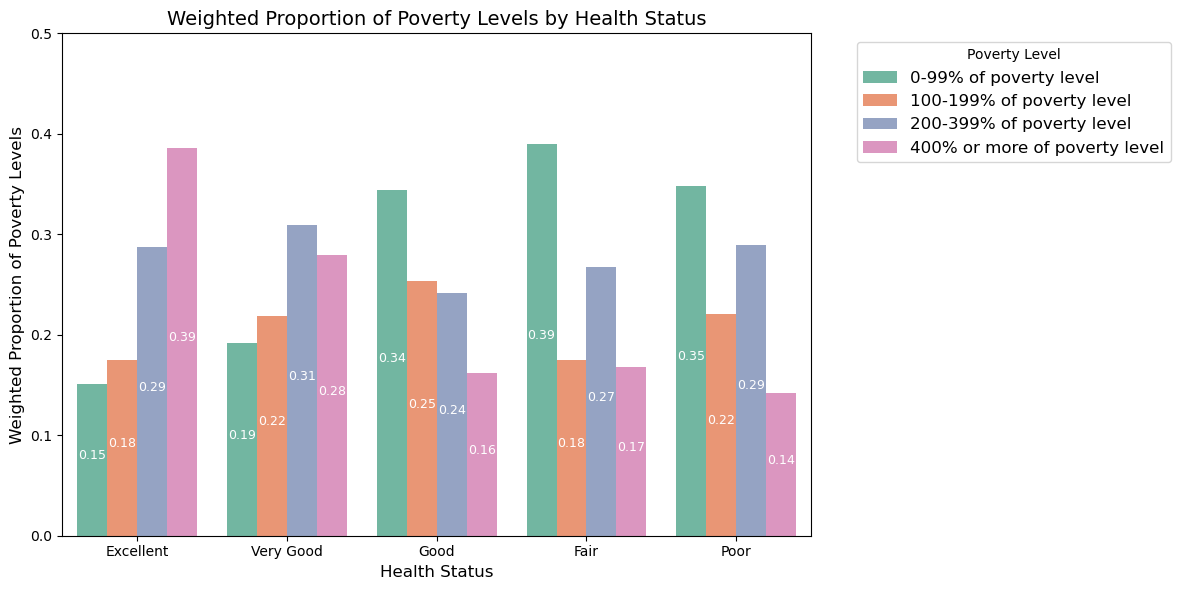

In [24]:
#7. How does family's poverty level (**NSCH, individual-level, K3, income, povlev4_23
#(Income level based on family poverty level status, imputed) **) impact children receiving 
#preventative care check-ups (**NSCH, individual-level, C1/C2, 1 or more visits versus 
#no visits, PrevMed_23**)?

#Weighted sum by group
prop_df = df_fam.groupby(['K2Q01_labeled', 'povlev4_labeled'])['FWC'].sum().reset_index(name='weighted_count')

#Total weight per health status
total_per_health = prop_df.groupby('K2Q01_labeled')['weighted_count'].transform('sum')

#Proportion = weighted count / total within health status
prop_df['proportion'] = prop_df['weighted_count'] / total_per_health

# Set categorical order
prop_df['K2Q01_labeled'] = pd.Categorical(prop_df['K2Q01_labeled'], categories=health_order, ordered=True)
prop_df['povlev4_labeled'] = pd.Categorical(prop_df['povlev4_labeled'], categories=povlev4_order, ordered=True)

#Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=prop_df,
    x='K2Q01_labeled',
    y='proportion',
    hue='povlev4_labeled',
    palette='Set2'
)

# Title and labels
plt.title('Weighted Proportion of Poverty Levels by Health Status', fontsize=14)
plt.xlabel('Health Status', fontsize=12)
plt.ylabel('Weighted Proportion of Poverty Levels', fontsize=12)
plt.legend(title='Poverty Level', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.ylim(0, 0.5)

#Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=9, color='white', padding=3)

plt.tight_layout()

# Save the plot
plt.savefig('Q7_K2Q01_povlev4_bar.png', dpi=300)  

plt.show()


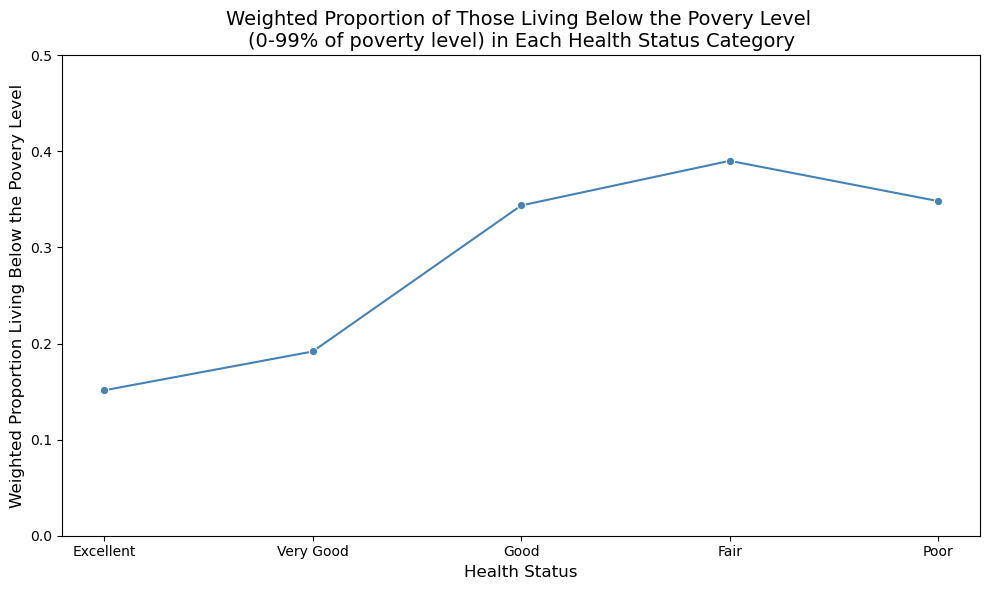

In [25]:
# Filter the DataFrame to only include rows where povlev4_labeled == '0-99'
filtered_df = prop_df[prop_df['povlev4_labeled'] == '0-99% of poverty level']

# Plot
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=filtered_df,
    x='K2Q01_labeled',
    y='proportion',
    marker='o',          # adds data points
    color='steelblue'    # set color
)

plt.title('Weighted Proportion of Those Living Below the Povery Level \n(0-99% of poverty level) in Each Health Status Category', fontsize=14)
plt.xlabel('Health Status', fontsize=12)
plt.ylabel('Weighted Proportion Living Below the Povery Level', fontsize=12)
plt.ylim(0, .5)  
plt.tight_layout()

# Save the plot
plt.savefig('Q7_K2Q01_povlev4_line.png', dpi=300)  
#Display
plt.show()

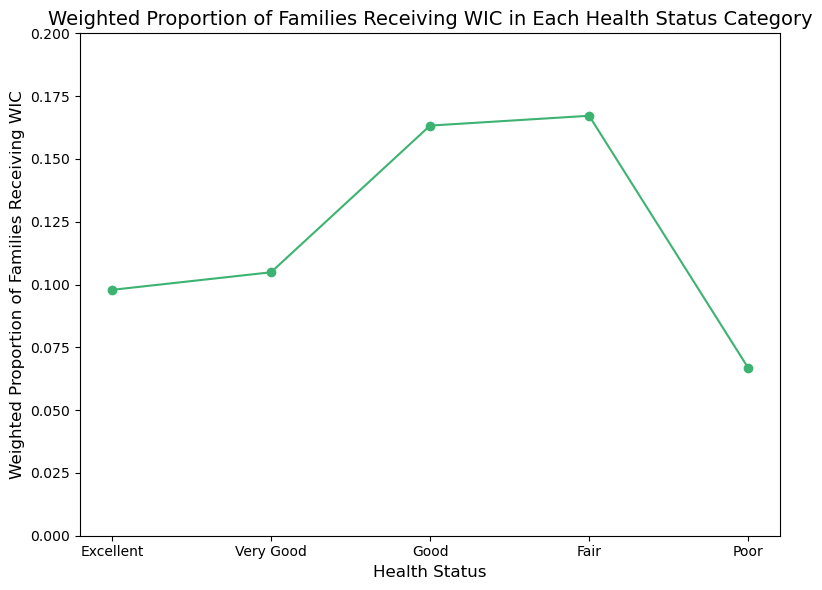

In [26]:
#8. What is the relationship between benefits from the Women, Infants, and Children (WIC) Program
#(**NSCH, individual-level, I7, Yes/No**, WIC_23)) and children receiving preventative care 
#check-ups (**NSCH, state-level, C1/C2, 1 or more visits versus no visits, PrevMed_23**)? 

#Compute weighted totals
weighted_totals = pd.crosstab(
    df_fam['K2Q01_labeled'],
    df_fam['WIC_labeled'],
    values=df_fam['FWC'],
    aggfunc='sum'
).reindex(index=health_order, columns=YN_order)

#Compute row sums
row_sums = weighted_totals.sum(axis=1)

#Divide by row sums to get weighted proportions
weighted_props = weighted_totals.div(row_sums, axis=0)

#Plot only the proportion for those with WIC
plt.figure(figsize=(8, 6))

plt.plot(weighted_props.index, weighted_props['Yes'], marker='o', color='mediumseagreen')

plt.title('Weighted Proportion of Families Receiving WIC in Each Health Status Category', fontsize=14)
plt.xlabel('Health Status', fontsize=12)
plt.ylabel('Weighted Proportion of Families Receiving WIC', fontsize=12)
plt.ylim(0, .2)  
plt.grid(False)

# Save the plot
plt.savefig('Q8_K2Q01_WIC_line.png', dpi=300)  

plt.tight_layout()
plt.show()

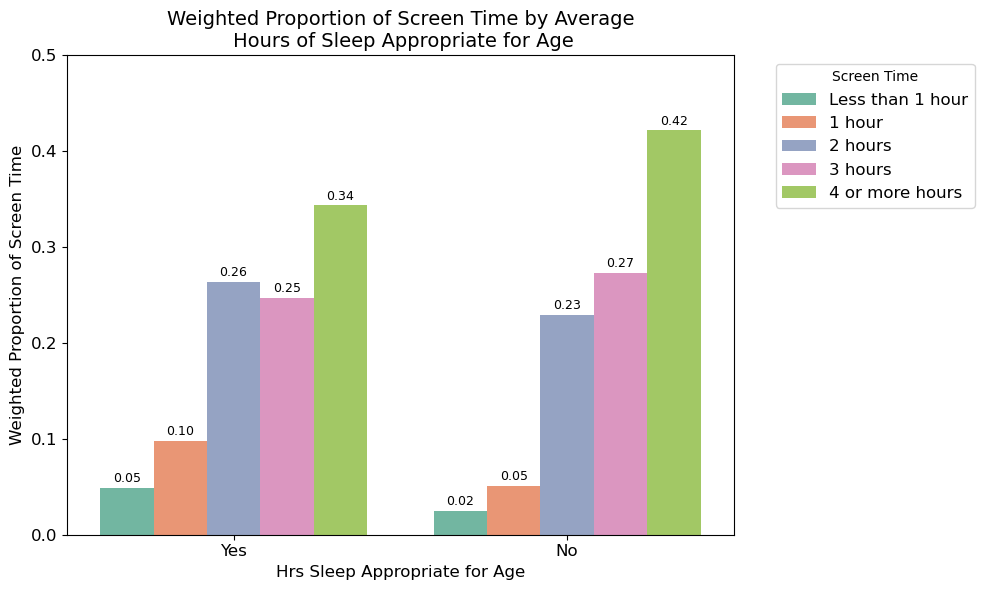

In [27]:
#9. Among teenagers, what impact does use of electronics (**NSCH, individual-level, H6, time spent in front of 
#the TV/computer/cellphone playing games/social media (not counting homework), ScreenTime_23 **)
#have on whether child slept the average recommended number of hours for age (**NSCH, 
#individual-level, H5, hours, HrsSleep_23 (Child slept recommended age-appropriate hours during
#an average day/on most weeknights, age 4 months – 17)**)? 

df_teen = df_fam[df_fam['SC_AGE_YEARS'] > 12].copy()

#Weighted sum by group
prop_df = df_teen.groupby(['HrsSleep_labeled', 'ScreenTime_labeled'])['FWC'].sum().reset_index(name='weighted_count')

#Total weight per health status
total_per_health = prop_df.groupby('HrsSleep_labeled')['weighted_count'].transform('sum')

#Proportion = weighted count / total within health status
prop_df['proportion'] = prop_df['weighted_count'] / total_per_health

# Set categorical order
prop_df['HrsSleep_labeled'] = pd.Categorical(prop_df['HrsSleep_labeled'], categories=YN_order, ordered=True)
prop_df['ScreenTime_labeled'] = pd.Categorical(prop_df['ScreenTime_labeled'], categories=ScreenTime_order, ordered=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=prop_df,
    x='HrsSleep_labeled',
    y='proportion',
    hue='ScreenTime_labeled',
    palette='Set2'
)

# Title and labels
plt.title('Weighted Proportion of Screen Time by Average\n Hours of Sleep Appropriate for Age', fontsize=14)
plt.xlabel('Hrs Sleep Appropriate for Age', fontsize=12)
plt.ylabel('Weighted Proportion of Screen Time', fontsize=12)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.legend(title='Screen Time', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.ylim(0, 0.5)

#Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)
plt.tight_layout()
# Save the plot
plt.savefig('Q9_ScreenTime_HrsSleep_bar.png', dpi=300)  
plt.show()
#Check having ADHA or asthma


C:\Users\vromm\AppData\Local\Temp\ipykernel_15692\3321386193.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_teen.groupby(['ScreenTime_labeled', 'HrsSleep_labeled'])['FWC'].sum().reset_index(name='weighted_count')
C:\Users\vromm\AppData\Local\Temp\ipykernel_15692\3321386193.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_screen = grouped.groupby('ScreenTime_labeled')['weighted_count'].transform('sum')


  ScreenTime_labeled HrsSleep_labeled  weighted_count  proportion
1   Less than 1 hour               No    1.456776e+05    0.167906
3             1 hour               No    2.982331e+05    0.170864
5            2 hours               No    1.347511e+06    0.256135
7            3 hours               No    1.601415e+06    0.304319
9    4 or more hours               No    2.474886e+06    0.326787
  ScreenTime_labeled HrsSleep_labeled  weighted_count  proportion
0   Less than 1 hour              Yes    7.219381e+05    0.832094
2             1 hour              Yes    1.447211e+06    0.829136
4            2 hours              Yes    3.913439e+06    0.743865
6            3 hours              Yes    3.660879e+06    0.695681
8    4 or more hours              Yes    5.098499e+06    0.673213


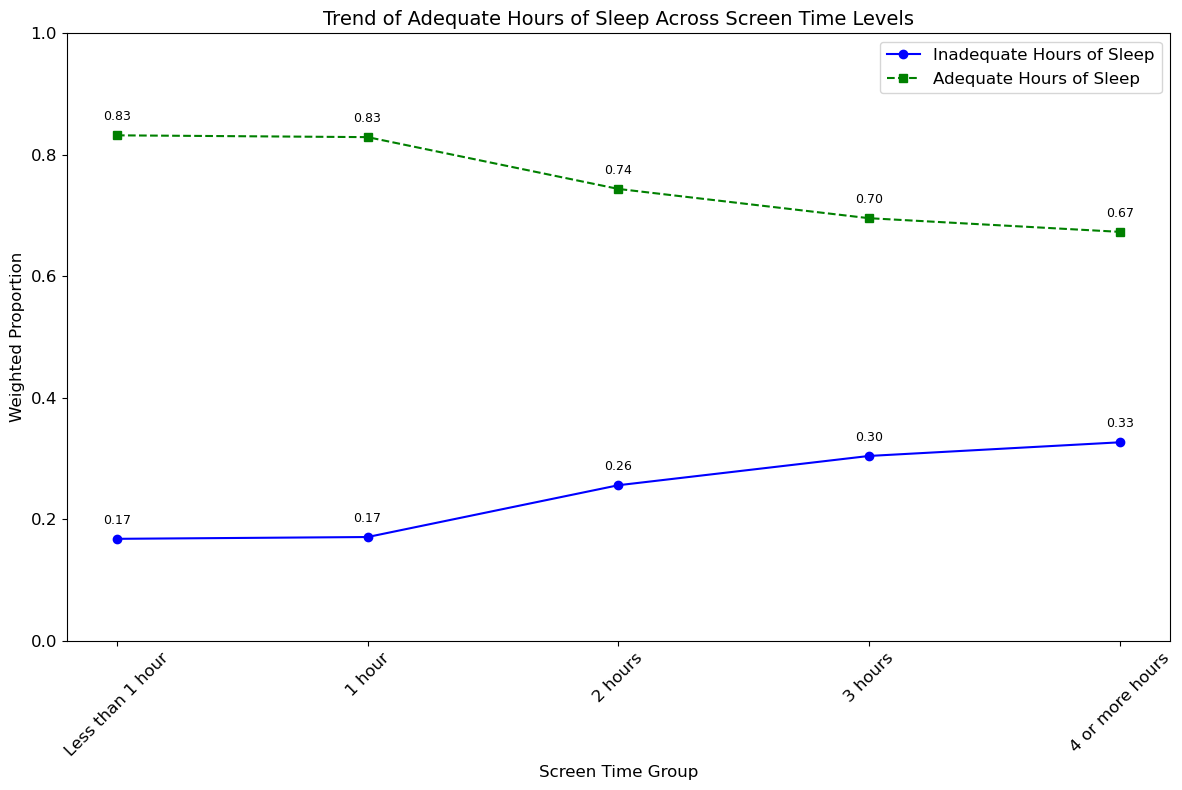

In [28]:
# Filter teens
df_teen = df_fam[df_fam['SC_AGE_YEARS'] > 12].copy()

# Set proper categorical order
df_teen['ScreenTime_labeled'] = pd.Categorical(df_teen['ScreenTime_labeled'], categories=ScreenTime_order, ordered=True)
df_teen['HrsSleep_labeled'] = pd.Categorical(df_teen['HrsSleep_labeled'], categories=YN_order, ordered=True)

# Weighted count of each sleep category within each screen time group
grouped = df_teen.groupby(['ScreenTime_labeled', 'HrsSleep_labeled'])['FWC'].sum().reset_index(name='weighted_count')

# Total weight per screen time group
total_per_screen = grouped.groupby('ScreenTime_labeled')['weighted_count'].transform('sum')

# Proportion within screen time
grouped['proportion'] = grouped['weighted_count'] / total_per_screen

# Separate DataFrames for each sleep type
inadequate_sleep = grouped[grouped['HrsSleep_labeled'] == 'No']
adequate_sleep = grouped[grouped['HrsSleep_labeled'] == 'Yes']

print(inadequate_sleep)
print(adequate_sleep)

# Create the figure
plt.figure(figsize=(12, 8))

# Plot both lines
plt.plot(inadequate_sleep['ScreenTime_labeled'], inadequate_sleep['proportion'],
         marker='o', linestyle='-', color='blue', label='Inadequate Hours of Sleep')

plt.plot(adequate_sleep['ScreenTime_labeled'], adequate_sleep['proportion'],
         marker='s', linestyle='--', color='green', label='Adequate Hours of Sleep')

# Titles and labels
plt.title('Trend of Adequate Hours of Sleep Across Screen Time Levels', fontsize=14)
plt.xlabel('Screen Time Group', fontsize=12)
plt.ylabel('Weighted Proportion', fontsize=12)
plt.xticks(fontsize=12), plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Axis ticks and legend
plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# annotate points with values
for df in [inadequate_sleep, adequate_sleep]:
    for i, row in df.iterrows():
        plt.text(row['ScreenTime_labeled'], row['proportion'] + 0.02, f"{row['proportion']:.2f}",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("Q9_ScreenTime_HrsSleepNo_Line.png", dpi=300)
plt.show()

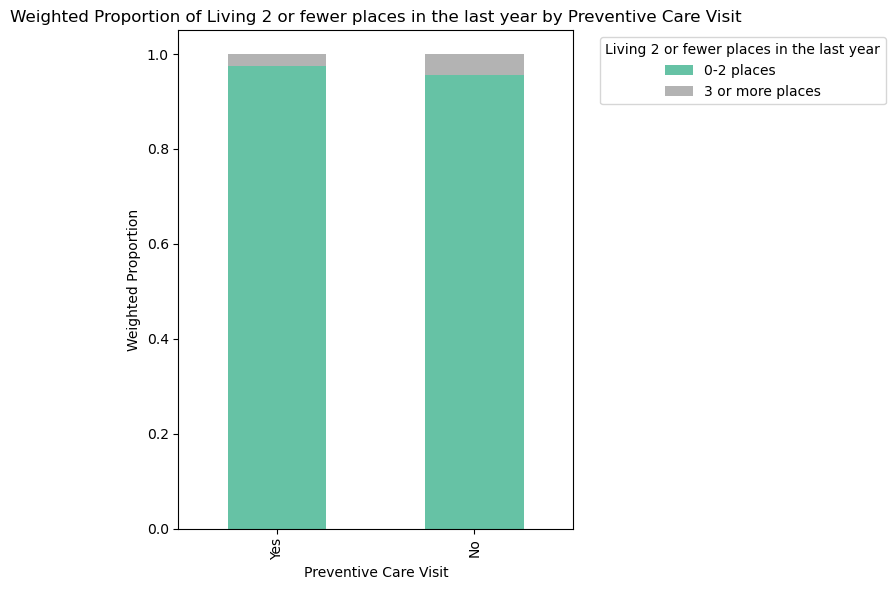

In [29]:
#10. Does moving two or more times in the last year (**NSCH, individual-level, I11, number of places 
#lived in the last year greater than 2, PlacesLived_23**) influence children receiving 
#preventative care check-ups (**NSCH, individual-level, C1/C2, 1 or more visits versus no visits, 
#PrevMed_23**) 

#Compute weighted totals
weighted_totals = pd.crosstab(
    df_fam['PrevMed_labeled'],
    df_fam['PlacesLived_labeled'],
    values=df_fam['FWC'],
    aggfunc='sum'
).reindex(index=YN_order, columns=PlacesLived_order)

#Compute row sums
row_sums = weighted_totals.sum(axis=1)

#Divide by row sums to get weighted proportions
weighted_props = weighted_totals.div(row_sums, axis=0)

# Plot
weighted_props.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))

plt.title('Weighted Proportion of Living 2 or fewer places in the last year by Preventive Care Visit')
plt.xlabel('Preventive Care Visit')
plt.ylabel('Weighted Proportion')
plt.legend(title='Living 2 or fewer places in the last year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

PrevMed_labeled           Yes        No
PlacesLived_labeled                    
0-2 places           0.802630  0.197370
3 or more places     0.694043  0.305957


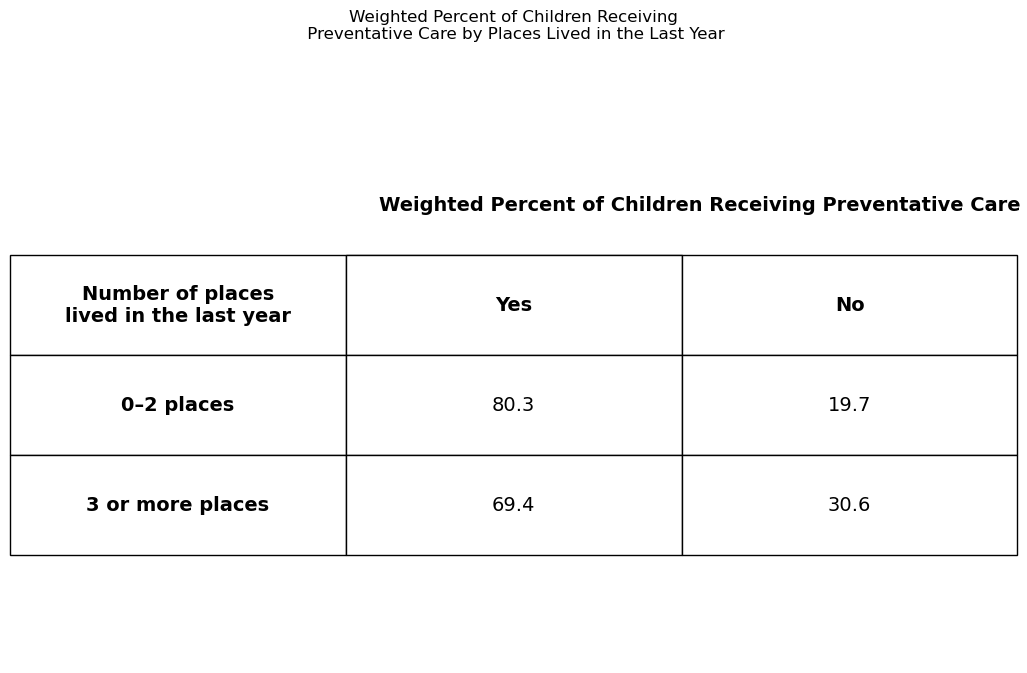

In [30]:
# Compute weighted totals
weighted_totals = pd.crosstab(
    df_fam['PlacesLived_labeled'],
    df_fam['PrevMed_labeled'],
    values=df_fam['FWC'],
    aggfunc='sum'
).reindex(index=PlacesLived_order, columns=YN_order)

#Compute row sums
row_sums = weighted_totals.sum(axis=1)

#Divide by row sums to get weighted proportions
weighted_props = weighted_totals.div(row_sums, axis=0)

print(weighted_props)

# From the table above we have:
#                     Yes       No
#0-2 places           0.802630  0.197370
#3 or more places     0.694043  0.305957

data = {
    'Yes': [80.3, 69.4],
    'No': [19.7, 30.6]
}
index = ['0–2 places', '3 or more places']
df = pd.DataFrame(data, index=index)

# Round for display
df_display = df.round(2).astype(str)

# ---- Build table manually with header simulation ---- #

# Row 0: Empty, spanning header, blank
header_row = ['', 'Weighted Percent of Children Receiving Preventative Care', '']
# Row 1: Row header and column headers
subheader_row = ['Number of places\nlived in the last year', 'Yes', 'No']

# Data rows
table_data = [header_row, subheader_row]
for idx, row in df_display.iterrows():
    table_data.append([idx] + row.tolist())

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

# Create table
tbl = ax.table(cellText=table_data, cellLoc='center', loc='center')

# Styling
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(1.3, 6.0)

for (row, col), cell in tbl.get_celld().items():
    if row in [0, 1] or col == 0:
        cell.set_text_props(weight='bold')

# Simulate spanning column header
tbl[(0, 0)].visible_edges = ''      # Hide top-left
tbl[(0, 2)].visible_edges = ''      # Hide right cell
tbl[(0, 1)].visible_edges = 'B'     # Only bottom edge (spanning effect)
tbl[(0, 1)].get_text().set_ha('center')  # Or 'left' if preferred

# Center the spanning header text
tbl[(0, 1)].get_text().set_ha('left')

plt.title('Weighted Percent of Children Receiving\n Preventative Care by Places Lived in the Last Year')

# Save and show
plt.savefig('Q10_PrevMed_PlacesLived_Tab.png', dpi=300, bbox_inches='tight')
plt.show()